# F21DL PORTFOLIO

# Dataset Selection

## 1. Clothing Dataset
[Clothing Dataset Link](https://www.kaggle.com/datasets/agrigorev/clothing-dataset-full)
### Pros
- Familiar Topic, in the sense that we are all familiar with clothing items and there is no need for any expertise knowledge in the field
- Distiguishable pictures available, in range of type, color and size of the clothing items which allows for a wide scope in exploring different sets
- Big Dataset giving our model plenty to train from and sufficient enough to make a train and test split

### Cons
- Unfamiliar with image processing techniques which are obviously vital, however this could be easily addressed by material provided in the course
- Large image size of the image means that we need to alter the pictures more before we can continue to use them
- Relatively more expensive, computationally, the large amount dataset means that it is going to take much more memory and time to run any form of code on the data.

## 2. IMDB Rating Games
[IMDB Rating Games Dataset Link](https://www.kaggle.com/datasets/muhammadadiltalay/imdb-video-games)
### Pros
- Large sample which similar to the clothing dataset provides a huge dataset for training the model which whould be ideal, with over 20k instances
- Lots of column features, apart from the pictures themself, the dataset also had some plot, genre and popularity features
- Easier to read and amend as there was a csv file provided for this dataset, this would be easier as compared to if we were reading from file with a for loop

### Cons
- Lot of missing/null data points, despite having a numerous amount features, some of them had missing or null values
- No coherence between each data
- Lot of features are repetitive, there was a colum for each genre owing to the fact that a game could possibly have multiple genres, this repetition would, meant that some of the columns came off with null values, which would mean a lot of data cleaning.

## 3. Large Body Water Dataset
[Waterbody Dataset Link](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies)
### Pros
- Small image size, which would mean that the preprocessing would be computationally less expensive.

### Cons
- Hard to classify(lack of knowledge in this field), added to the fact that the sample size is quite small it would be hard to recognise the 
- Low resolution images
- Small dataset sample size


### Conclusion
**On balance the concensus was that the clothing dataset offered a range of exploration, in that the image set had dataset for wide variety of clothing items, in type and size, which would offer a big range for training a model in recognising these varieties**

### Source control
[Github Link](https://github.com/hoxyshmoo/DataMiningStuff)

# WEEK 2 Data Exploration and Visualisation

In [1]:
#pip install tensorflow

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import plotly.express as px
#import tensorflow as tf
#from tensorflow import keras

In [2]:
#In here are the jpg images
image_dir = os.path.join("datasets", "clothing", "images.csv")
compressed_dir = os.path.join("datasets", "clothing","images_compressed")
original_dir = os.path.join("datasets", "clothing","images_original")
new_size = (256, 256)

In [3]:
#Reading the data from the csv file
#Considers the attributes of the dataset
clothing_data = pd.read_csv(image_dir)
clothing_data.head()

image  sender_id     label   kids
0  4285fab0-751a-4b74-8e9b-43af05deee22        124  Not sure  False
1  ea7b6656-3f84-4eb3-9099-23e623fc1018        148   T-Shirt  False
2  00627a3f-0477-401c-95eb-92642cbe078d         94  Not sure  False
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa         43   T-Shirt  False
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0        189     Shoes  False

In [4]:
# This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
# Here we check for null data points
clothing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      5403 non-null   object
 1   sender_id  5403 non-null   int64 
 2   label      5403 non-null   object
 3   kids       5403 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 132.0+ KB


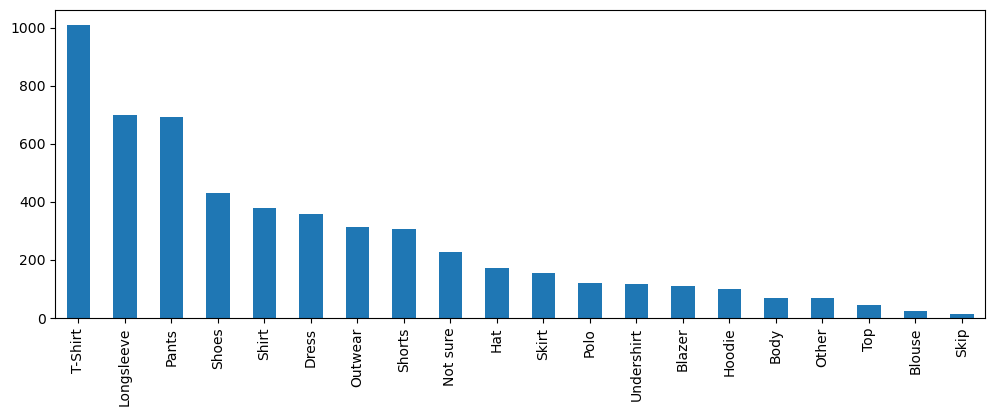

In [5]:
#what is the distribution and/or frequency of the available clothing items.
plt.figure(figsize=(12, 4))
clothing_data["label"].value_counts(sort=True).plot(kind="bar")
plt.show()

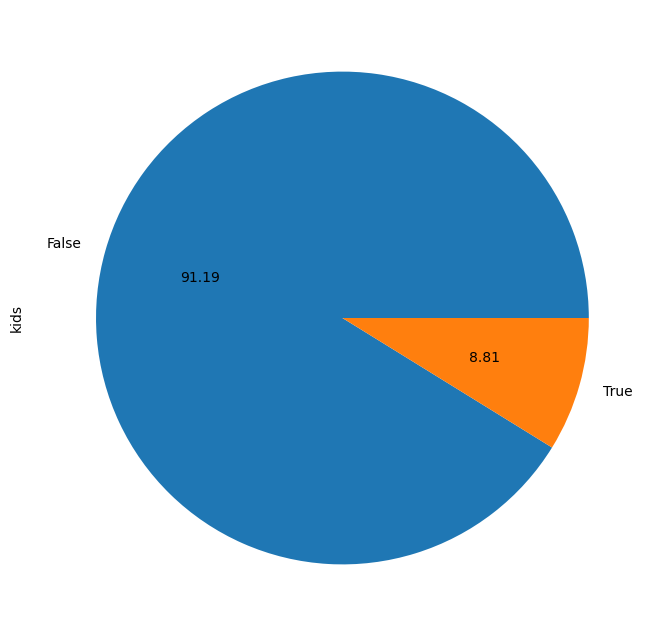

In [6]:
#what proportion of our clothing dataset relates to kids clothing?
plt.figure(figsize=(8, 8))
clothing_data["kids"].value_counts(sort=True).plot(kind="pie", autopct="%0.2f")
plt.show()

In [7]:
#keeping the relevant columns and adding jpg to the image names
clothing_data['image'] = clothing_data['image']+'.jpg'
clothing_data_new = clothing_data[['image', 'label']]
clothing_data_new.head()

image     label
0  4285fab0-751a-4b74-8e9b-43af05deee22.jpg  Not sure
1  ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg   T-Shirt
2  00627a3f-0477-401c-95eb-92642cbe078d.jpg  Not sure
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg   T-Shirt
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg     Shoes

In [8]:
#How many images do we have in our dataset?
print(f"There are {len(os.listdir(compressed_dir))} images in training set")

There are 5762 images in training set


In [9]:
#Identifying corrupted files so that we can remove them corrupted images from the dataset
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(compressed_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

datasets/clothing/images_compressed/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg
datasets/clothing/images_compressed/784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg
datasets/clothing/images_compressed/b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
datasets/clothing/images_compressed/1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
datasets/clothing/images_compressed/c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
datasets/clothing/images_compressed/040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg


In [10]:
#These images cannot be opened and so we remove them
corrupted = ['b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg', '1d0129a1-f29a-4a3f-b103-f651176183eb.jpg', 'c60e486d-10ed-4f64-abab-5bb698c736dd.jpg', 
            'd028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg', '040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg', '784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg']
clothing_data_new = clothing_data_new.drop(clothing_data_new[clothing_data_new['image'].isin(corrupted)].index, axis=0)
print(f"There are {len(clothing_data_new)} images in training set")


There are 5398 images in training set


In [12]:
# Label is the categorical variable so we check how many we have for each category
clothing_data_new['label'].value_counts()

T-Shirt       1011
Longsleeve     699
Pants          692
Shoes          431
Shirt          378
Dress          357
Outwear        312
Shorts         308
Not sure       228
Hat            171
Skirt          155
Polo           120
Undershirt     118
Blazer         109
Hoodie         100
Body            69
Other           67
Top             43
Blouse          23
Skip             7
Name: label, dtype: int64

In [11]:
#Visualising the categories
fig = px.bar(clothing_data_new['label'].value_counts())
fig.show()

In [13]:
#How many classes do we have in our dataset
classes = list(clothing_data_new['label'].unique())
print(f"There are {len(classes)} classes in the dataset")
classes

There are 20 classes in the dataset


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

### Data Cleaning

In [14]:
#Removing classes that unidentified
labels_to_remove = ['Skip', 'Not sure', 'Other', 'Blouse','Shorts','Pants','Skirt','Top','Outwear','Body','Longsleeve','Undershirt','Polo','Hoodie','Blazer','Hat','Dress','Shirt']
clothing_data_new = clothing_data_new[~clothing_data_new['label'].isin(labels_to_remove)]

In [15]:
#Visualising the dataset after the removal of some classes
fig = px.bar(clothing_data_new['label'].value_counts())
fig.show()

In [16]:
#How many classes do we have after the removal of unidentified classes?
new_classes = list(clothing_data_new['label'].unique())
print(f"There are {len(new_classes)} classes in the dataset after removing some classes.")
new_classes

There are 2 classes in the dataset after removing some classes.


['T-Shirt', 'Shoes']

In [17]:
labels_y=clothing_data.label
labels_num1=labels_y[:100]
labels_num1

0       Not sure
1        T-Shirt
2       Not sure
3        T-Shirt
4          Shoes
         ...    
95    Undershirt
96       T-Shirt
97        Blouse
98        Shorts
99       T-Shirt
Name: label, Length: 100, dtype: object

In [18]:
labels_unique=labels_num1.unique()
print(labels_unique.shape)

(17,)


In [19]:
nr_foods = 17
#labels_values=list(labels_values)

idx_to_name = {i:x for (i,x) in enumerate(labels_unique[:nr_foods])}
name_to_idx = {x:i for (i,x) in enumerate(labels_unique[:nr_foods])}

idx_to_name

{0: 'Not sure',
 1: 'T-Shirt',
 2: 'Shoes',
 3: 'Shorts',
 4: 'Shirt',
 5: 'Pants',
 6: 'Skirt',
 7: 'Other',
 8: 'Top',
 9: 'Outwear',
 10: 'Dress',
 11: 'Body',
 12: 'Longsleeve',
 13: 'Undershirt',
 14: 'Hat',
 15: 'Polo',
 16: 'Blouse'}

In [20]:
#Assigning an index for each of the classes
repl={}
for i in range(len(new_classes)):
    repl[new_classes[i]]=i
    
repl

{'T-Shirt': 0, 'Shoes': 1}

In [21]:
clothing_data_new.head()

image    label
1  ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg  T-Shirt
3  ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg  T-Shirt
4  3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg    Shoes
7  4c8f245e-a039-46fd-a6b9-1bb51e83fc05.jpg  T-Shirt
9  bf78527f-0734-44fd-a968-f6c32c12d61e.jpg    Shoes

# WEEK 3 Image Processing

In [22]:
new_size = (256, 256)

100%|███████████████████████████████████████| 1442/1442 [03:28<00:00,  6.90it/s]


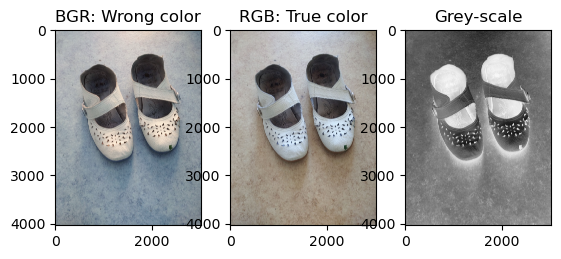


images_arr: (1442, 256, 256, 3)
images_bw_arr: (1442, 256, 256)


In [23]:
import cv2
from PIL import Image
from tqdm import tqdm 
   
images, images_bw = [], []
labels_strs = []
for img in tqdm(clothing_data_new['image']):
    #print(f'\n-> {img}')
    
    image_wc = cv2.imread(f'{original_dir}/{img}', cv2.IMREAD_COLOR)
    
    # cv2 reads images as BGR and not RGB:
    image_tc = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2RGB)
    # Convert images to grey scale:
    image_tc_bw = cv2.cvtColor(src=image_wc, code=cv2.COLOR_BGR2GRAY)
    #print(f'\nimage_tc_bw: {image_tc_bw.shape}, {type(image_tc_bw)}')
    
    # Resize images to the new shape:
    image_tc_rs = cv2.resize(src=image_tc, dsize=new_size)
    image_tc_bw_rs = cv2.resize(src=image_tc_bw, dsize=new_size)
    
    # Store images and labels:
    images.append(image_tc_rs)
    images_bw.append(image_tc_bw_rs)
    
    #labels
    image_name = img
    clothing_label_instance = clothing_data_new.loc[clothing_data_new['image'] == image_name,'label'].item()
    labels_strs.append(clothing_label_instance)
    

fig, axis = plt.subplots(nrows=1, ncols=3)
axis[0].imshow(image_wc)
axis[0].set_title('BGR: Wrong color')
axis[1].imshow(image_tc)
axis[1].set_title('RGB: True color')
axis[2].imshow(image_tc_bw, cmap='Greys')
axis[2].set_title('Grey-scale')
plt.show()

images_arr = np.stack(images)
print(f'\nimages_arr: {images_arr.shape}')
images_bw_arr = np.stack(images_bw)
print(f'images_bw_arr: {images_bw_arr.shape}')



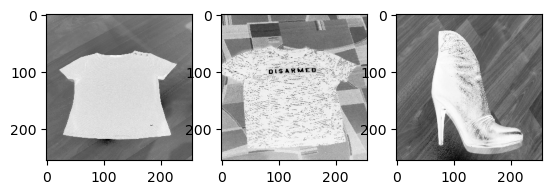


label_strs: ['T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'Shoes', 'Shoes', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'Shoes', 'Shoes', 'T-Shirt', 'Shoes', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'Shoes', 'Shoes', 'Shoes', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'T-Shirt', 'Shoes', 'T-Shirt', 'T-Shir


df: (1442, 65536)
   pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  pixels_7  \
0       142       140       133       129       134       135       141   
1       154       152       151       158       156       151       153   
2       160       163       154       163       170       168       168   
3        54        56        63        58        58        51        56   
4        77        78        86        88        93        96        96   

   pixels_8  pixels_9  pixels_10  ...  pixels_65527  pixels_65528  \
0       143       148        144  ...           154           157   
1       159       159        159  ...            74            85   
2       160       169        171  ...           182           176   
3        54        52         51  ...           104           105   
4        98        99         96  ...           170           168   

   pixels_65529  pixels_65530  pixels_65531  pixels_65532  pixels_65533  \
0           157           155           

In [26]:
fig, axis = plt.subplots(nrows=1, ncols=3)
axis[0].imshow(images_bw_arr[0], cmap='Greys')
axis[1].imshow(images_bw_arr[1], cmap='Greys')
axis[2].imshow(images_bw_arr[2], cmap='Greys')
plt.show()

# Label strings to unique integers:
print(f'\nlabel_strs: {labels_strs}')
label_ints = pd.Categorical(labels_strs).codes
print(f'label_ints: {label_ints}')
labels_arr = np.array(label_ints)
print(f'labels_arr: {labels_arr}, {labels_arr.shape}, {type(labels_arr)}')
# Putting it all together:
# Flattening array along columns; 
# 256*256 = 65536 / with RGB 256*256*3 = 196608
features = images_bw_arr.reshape((len(labels_arr), -1))
print(f'\nfeatures: {features.shape}')
labels = labels_arr.reshape((len(labels_arr), -1))
print(f'labels: {labels.shape}')
df = pd.DataFrame(
    data=features, 
    columns=['pixels_'+str(i+1) for i in range(features.shape[1])])
print(f'\ndf: {df.shape}')
print(df.head())
# Append labels-column:
df['labels'] = labels
print(f'df: {df.shape}')



In [27]:
# Train test split of the data:
# 1) If you work with two numpy arrays:
x_train, x_test, y_train, y_test = train_test_split(features, labels)
# 1) If you work with a pandas dataframe:
# IMPORTANT: If features and labels are stored in the same dataframe,
# you need to remove those when passing the features, just as done
# below with the slicing df.iloc[:,0:-1], otherwise you have 'label leackage'
# https://en.wikipedia.org/wiki/Leakage_(machine_learning)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['labels'])

# WEEK 4 Classifier Testing and Evaluation

In [ ]:
#import the metrics for measuring the model fit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, recall_score,precision_score

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [51]:
features.shape

(1442, 65536)

In [53]:
labels.shape

(1442, 1)

In [73]:
features[0]

array([142, 140, 133, ..., 154, 153, 157], dtype=uint8)

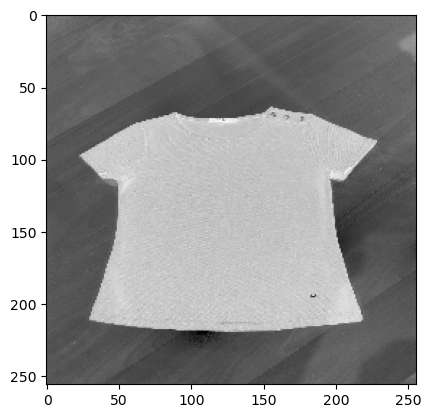

In [58]:
some_clothe = features[0]
some_clothe_image = some_clothe.reshape(256, 256)
plt.imshow(some_clothe_image, cmap=mpl.cm.binary)
plt.show()

In [29]:
y_train_shirt = (y_train == 0) # True for all t-shirts, False for all other clothing items
y_test_shirt = (y_test == 0)

### Stochastic Gradient Descent

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(x_train, y_train_shirt)

SGDClassifier(random_state=42)

### Performance Measures

In [33]:
#Accuracy
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_shirt, cv=3, scoring="accuracy")

array([0.83379501, 0.79166667, 0.81111111])

In [35]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_shirt, cv=3)

In [36]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_shirt, y_train_pred)

array([[668,  84],
       [119, 210]])

In [37]:
y_train_perfect_predictions = y_train_shirt  # pretend we reached perfection
confusion_matrix(y_train_shirt, y_train_perfect_predictions)

array([[752,   0],
       [  0, 329]])

/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



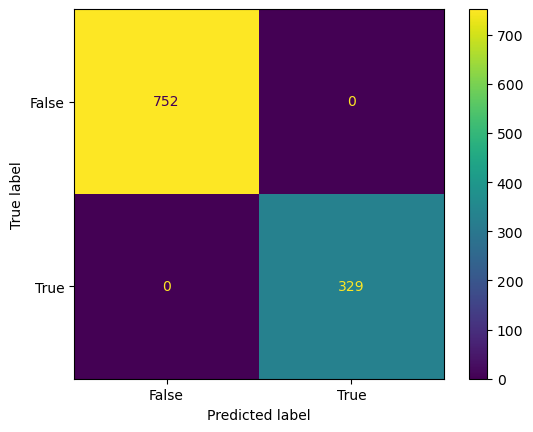

In [50]:
plot_confusion_matrix(sgd_clf, x_train, y_train_shirt)

#### Precision and Recall

In [39]:
# Precision
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_shirt, y_train_pred)

0.7142857142857143

In [41]:
# Recall
recall_score(y_train_shirt, y_train_pred)


0.6382978723404256

In [43]:
#f_score
from sklearn.metrics import f1_score

f1_score(y_train_shirt, y_train_pred)


0.6741573033707866

#### Precision/Recall Trade off

In [59]:
y_scores = sgd_clf.decision_function([some_clothe])
y_scores

/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names



array([25277623.06319142])

In [61]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [65]:
threshold = 80000000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [67]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_shirt, cv=3,
                             method="decision_function")

In [74]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_shirt, y_scores)
precisions
recalls
thresholds

array([-6.98911576e+08, -6.22438011e+08, -5.97094287e+08, ...,
        7.59270359e+08,  7.87527670e+08,  9.31809726e+08])

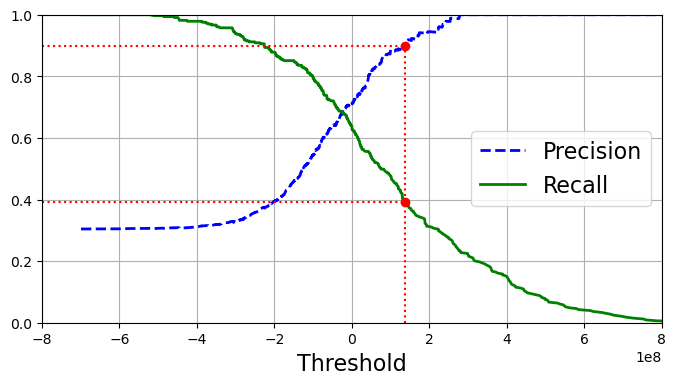

In [78]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-800000000, 800000000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-800000000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-800000000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [79]:
(y_train_pred == (y_scores > 0)).all()

True

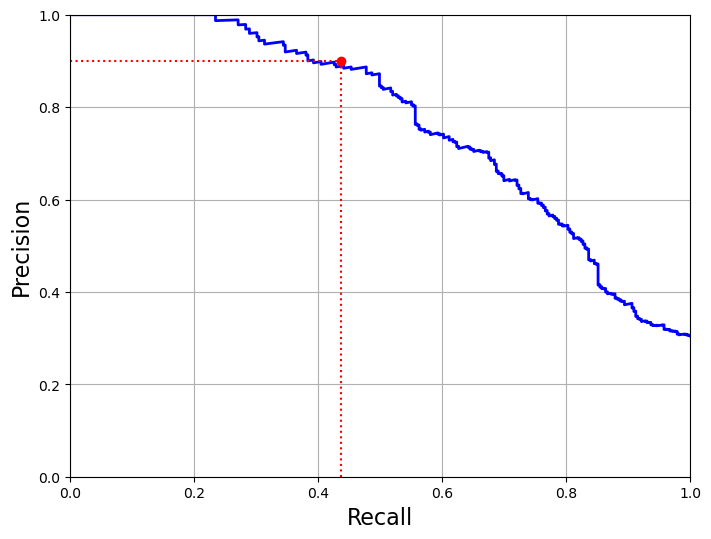

In [80]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [82]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

138331552.6698822

In [86]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
precision_score(y_train_shirt, y_train_pred_90)


0.9020979020979021

In [85]:
recall_score(y_train_shirt, y_train_pred_90)

0.39209726443769

#### The ROC Curve

In [87]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_shirt, y_scores)

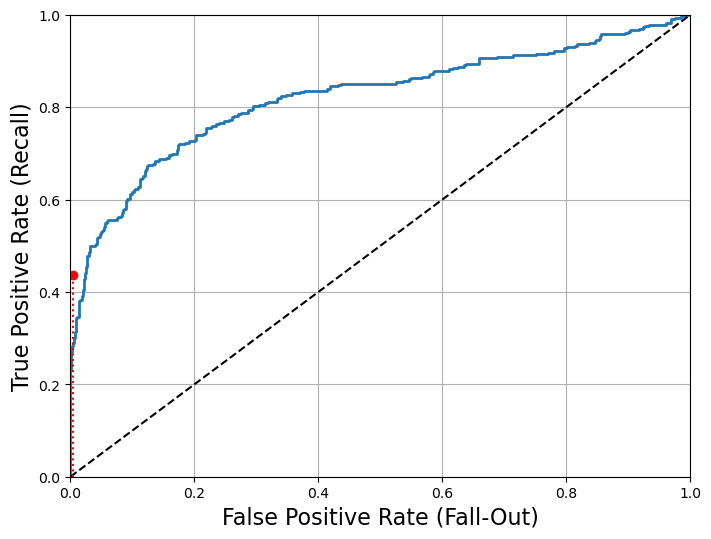

In [88]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_shirt, y_scores)

0.8217519239474874

# WEEK 5 Bayesian Learning

In [1]:
from sklearn.naive_bayes import MultinomialNB

In [2]:
Mnb = MultinomialNB()

In [ ]:
modelNB = Mnb.fit(x_train, y_train)

In [ ]:
predNB = Mnb.predict(x_test)

#### Performance Measures

# WEEK 7 Clustering

### K-MEANS CLUSTERING

In [29]:
df.shape

(1442, 65537)

In [30]:
# checking the labels we have in our dataset
sorted(df['labels'].unique())

[0, 1]

In [31]:
# for applying clustering we do not need the labels
df_features = df.drop('labels', axis=1)
df_features.head()

pixels_1  pixels_2  pixels_3  pixels_4  pixels_5  pixels_6  pixels_7  \
0       142       140       133       129       134       135       141   
1       154       152       151       158       156       151       153   
2       160       163       154       163       170       168       168   
3        54        56        63        58        58        51        56   
4        77        78        86        88        93        96        96   

   pixels_8  pixels_9  pixels_10  ...  pixels_65527  pixels_65528  \
0       143       148        144  ...           154           157   
1       159       159        159  ...            74            85   
2       160       169        171  ...           182           176   
3        54        52         51  ...           104           105   
4        98        99         96  ...           170           168   

   pixels_65529  pixels_65530  pixels_65531  pixels_65532  pixels_65533  \
0           157           155           158           152           157   
1            95            88            86            84            87   
2           164           151           140           141           153   
3           114            95            71            73            71   
4           167           161           160           159           151   

   pixels_65534  pixels_65535  pixels_65536  
0           154           153           157  
1            76            85            85  
2           154           164           158  
3            62            77            86  
4           145           142           143  

[5 rows x 65536 columns]

In [32]:
# copying labels for testing purpose
df_labels = df['labels']
df_labels.head()

0    1
1    1
2    0
3    1
4    0
Name: labels, dtype: int8

In [33]:
from sklearn.cluster import KMeans

In [34]:
k = 7 # because we have 16 labels in our dataset
kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_features)


In [35]:
kmeans_centroids = kmeans.cluster_centers_

In [36]:
kmeans_centroids.shape

(7, 65536)

In [37]:
# checking the labels of our predicted model
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [38]:
# we use the predicted labels to compare with our labels
# but first we extract a small sample

df_test = df.sample(10, replace=False)

df_test_features = df_test.drop('labels', axis=1)

df_test_labels = df_test['labels']

In [39]:
df_test_labels

1145    1
1005    1
167     0
153     1
41      0
1347    1
514     0
523     0
1339    1
1292    0
Name: labels, dtype: int8

In [40]:
# converting to an array
df_test_labels = np.array(df_test_labels)
df_test_labels

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int8)

In [41]:
# predicting

pred_clusters = kmeans.predict(df_test_features)

In [42]:
# comparing the two
pred_results = pd.DataFrame({'Actual label': df_test_labels,
                            'Predicted label' : pred_clusters})

pred_results

Actual label  Predicted label
0             1                4
1             1                3
2             0                2
3             1                4
4             0                0
5             1                1
6             0                3
7             0                5
8             1                4
9             0                1

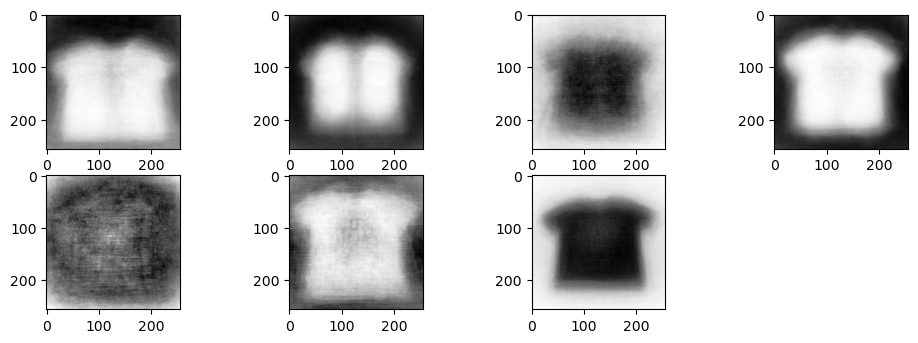

In [43]:
# visualizing 
fig, ax = plt.subplots(figsize=(12,8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(4,4, centroid + 1)
    
    plt.imshow(kmeans_centroids[centroid].reshape(256,256), cmap='Greys')

In [44]:
type(x_train)

pandas.core.frame.DataFrame

In [45]:
#using pca to first compress our training and testimage dataset before clustering
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_train = pca.fit_transform(x_train)
principal_test = pca.fit_transform(x_test)

pca_features_train = pd.DataFrame(data = principal_train
             , columns = ['Feature_1', 'Feature_2'])

pca_features_test = pd.DataFrame(data = principal_test
             , columns = ['Feature_1', 'Feature_2'])

In [46]:
k = 7
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(principal_train)

In [47]:
y_pred

array([0, 0, 1, ..., 5, 4, 2], dtype=int32)

In [48]:
y_pred is kmeans.labels_

True

In [49]:
kmeans.cluster_centers_

array([[-10156.84922858,   3309.41433359],
       [ 15473.89219219,  -3583.00815076],
       [  1162.55625738,  10882.54470905],
       [  -664.74551791,    282.54494971],
       [ -7267.16386582,  -5100.0123582 ],
       [  9904.98775023,   3918.07808661],
       [  4418.19955635,  -6115.90907142]])

In [50]:
kmeans.labels_

array([0, 0, 1, ..., 5, 4, 2], dtype=int32)

#### Hard vs Soft Clustering

In [51]:
# HARD CLUSTERING
# assigns directly to one class

hard_pred_clusters = kmeans.predict(principal_test)
hard_pred_clusters

array([2, 6, 4, 4, 5, 3, 0, 5, 5, 5, 5, 0, 2, 6, 5, 0, 3, 6, 0, 0, 4, 1,
       0, 6, 4, 1, 5, 1, 4, 6, 6, 5, 4, 1, 1, 2, 6, 1, 0, 4, 2, 6, 4, 6,
       3, 4, 6, 5, 3, 3, 6, 4, 5, 1, 2, 6, 4, 4, 0, 6, 0, 5, 6, 4, 0, 2,
       2, 0, 5, 4, 4, 3, 5, 1, 1, 2, 2, 4, 0, 0, 0, 0, 2, 3, 0, 5, 6, 4,
       5, 0, 6, 6, 3, 0, 4, 3, 4, 6, 2, 3, 0, 3, 0, 2, 0, 4, 6, 1, 4, 0,
       5, 3, 5, 5, 6, 4, 4, 4, 0, 5, 1, 3, 1, 5, 1, 0, 3, 6, 6, 4, 3, 2,
       1, 4, 3, 0, 2, 2, 0, 5, 6, 3, 4, 2, 4, 3, 4, 5, 1, 3, 4, 4, 0, 0,
       2, 2, 5, 3, 4, 5, 5, 6, 6, 4, 6, 6, 5, 0, 6, 1, 0, 0, 3, 0, 4, 4,
       6, 0, 3, 4, 5, 5, 5, 6, 4, 4, 4, 1, 6, 4, 0, 2, 6, 0, 4, 5, 1, 4,
       0, 3, 3, 2, 3, 0, 4, 3, 4, 4, 4, 3, 3, 3, 5, 4, 1, 1, 5, 1, 4, 6,
       6, 4, 4, 3, 1, 2, 6, 4, 5, 4, 2, 4, 4, 6, 0, 6, 4, 2, 4, 0, 1, 2,
       5, 6, 4, 0, 6, 3, 3, 3, 6, 2, 2, 0, 2, 1, 5, 4, 5, 4, 2, 5, 6, 6,
       2, 0, 4, 0, 3, 5, 1, 4, 5, 0, 0, 0, 4, 4, 4, 3, 3, 6, 5, 6, 6, 2,
       4, 0, 4, 4, 0, 1, 5, 0, 4, 5, 0, 4, 0, 2, 4,

In [52]:
# SOFT CLUSTERING
# gives a score per a cluster

soft_pred_clusters = kmeans.transform(principal_test)
soft_pred_clusters

array([[ 9486.35003781, 25918.92271191,  6736.71768369, ...,
        16783.98340039, 17244.27349687, 20316.33024604],
       [16629.90350048, 12986.98381244, 17920.28573102, ...,
        10364.6828747 , 12913.44061681,  1705.23208481],
       [10497.41418435, 24648.11602026, 20629.15519845, ...,
         2605.9671585 , 21819.74045659, 13375.42526022],
       ...,
       [10703.35169094, 18465.45470819, 16037.74692513, ...,
         4331.6677597 , 15440.20437819,  7531.81397312],
       [28935.94724636,  3394.54082935, 23609.34775145, ...,
        24342.76518344, 12703.96334309, 12620.42638521],
       [14459.83490637, 16737.43391202,  3626.89657882, ...,
        17024.91578004,  7659.38883348, 14244.74833652]])

In [53]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

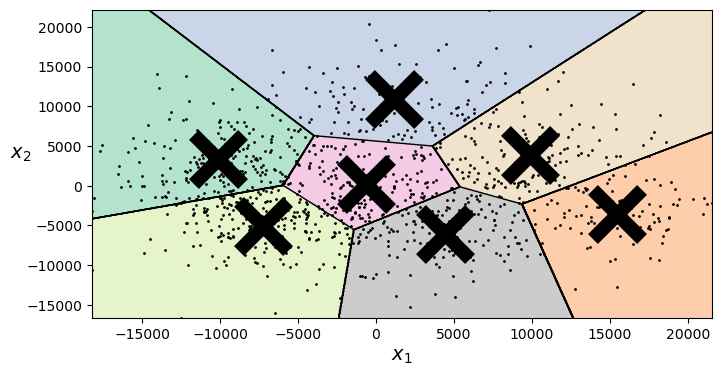

In [54]:
# visualising how our model clusters the data

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, principal_train)
plt.show()

#### ITERATION OF K-MEANS

In [55]:
kmeans_iter1 = KMeans(n_clusters=7, init="random", n_init=1,
                     algorithm="full", max_iter=500, random_state=1)
kmeans_iter2 = KMeans(n_clusters=7, init="random", n_init=1,
                     algorithm="full", max_iter=1000, random_state=1)
kmeans_iter3 = KMeans(n_clusters=7, init="random", n_init=1,
                     algorithm="full", max_iter=1500, random_state=1)
kmeans_iter1.fit(principal_train)
kmeans_iter2.fit(principal_train)
kmeans_iter3.fit(principal_train)

/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.

/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1316: FutureWarning:

algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



KMeans(algorithm='full', init='random', max_iter=1500, n_clusters=7, n_init=1,
       random_state=1)

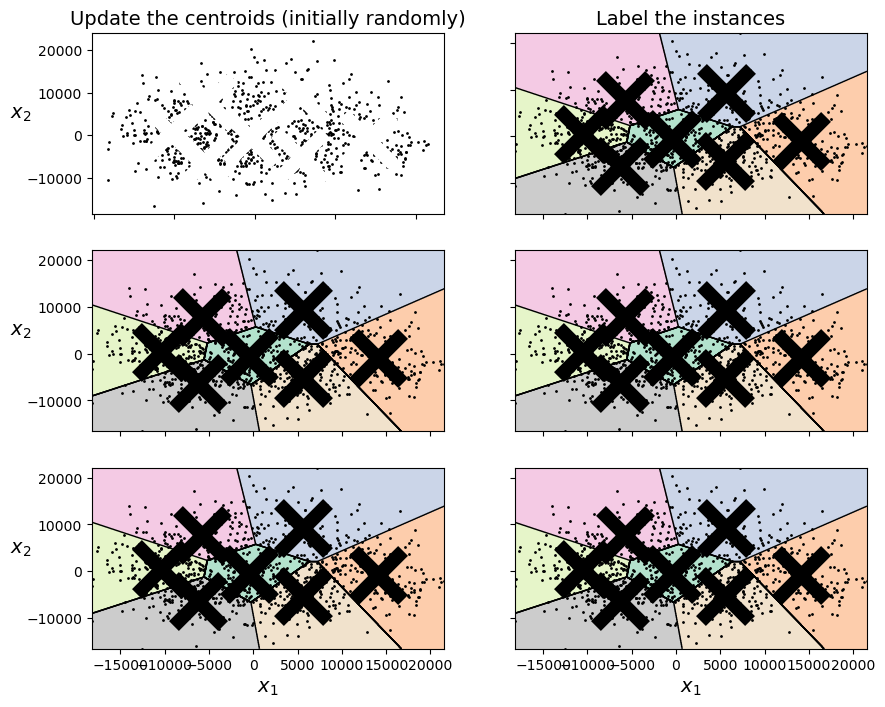

In [56]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(principal_train)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, principal_train, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, principal_train, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,principal_train, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, principal_train, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, principal_train, show_ylabels=False)

plt.show()

## EM ALGORITHM

In [57]:
from sklearn.mixture import GaussianMixture

In [58]:
k = 7
EM = GaussianMixture(k)
y_pred_gmm = EM.fit(pca_features_train)

In [59]:
#HARD CLUSTERING
em_cluster_hard = EM.predict(pca_features_test)
em_cluster_hard

array([4, 5, 0, 0, 5, 1, 3, 2, 2, 2, 6, 4, 4, 5, 2, 4, 1, 5, 3, 3, 0, 2,
       3, 5, 0, 2, 2, 2, 0, 5, 5, 2, 3, 2, 2, 4, 5, 2, 3, 0, 1, 5, 0, 5,
       4, 0, 5, 2, 1, 1, 0, 0, 6, 2, 4, 5, 0, 0, 3, 5, 4, 1, 5, 0, 4, 6,
       6, 4, 2, 0, 3, 0, 6, 2, 2, 6, 6, 0, 3, 4, 3, 3, 4, 1, 3, 2, 5, 0,
       2, 3, 0, 5, 0, 3, 3, 1, 3, 0, 4, 1, 3, 0, 3, 6, 3, 3, 0, 2, 3, 4,
       6, 1, 2, 2, 5, 3, 0, 0, 3, 6, 2, 0, 2, 2, 2, 3, 1, 0, 5, 0, 0, 6,
       2, 0, 1, 4, 6, 6, 4, 5, 5, 1, 0, 4, 3, 4, 3, 2, 2, 0, 0, 3, 4, 3,
       6, 6, 2, 1, 0, 5, 2, 5, 5, 3, 5, 5, 2, 3, 5, 2, 3, 3, 0, 4, 3, 0,
       5, 4, 1, 0, 2, 2, 5, 5, 3, 0, 0, 2, 5, 0, 4, 6, 5, 3, 0, 2, 2, 0,
       3, 1, 1, 6, 1, 3, 3, 1, 3, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 5,
       5, 0, 0, 1, 2, 6, 5, 3, 5, 0, 4, 0, 0, 5, 4, 5, 3, 6, 0, 3, 2, 6,
       6, 5, 0, 4, 5, 4, 1, 1, 5, 6, 6, 3, 4, 2, 2, 0, 6, 3, 4, 2, 5, 5,
       6, 4, 0, 4, 0, 2, 2, 3, 6, 4, 4, 3, 0, 0, 3, 0, 1, 5, 6, 5, 5, 6,
       0, 3, 0, 3, 4, 2, 5, 4, 0, 2, 3, 0, 4, 6, 0,

In [60]:
#SOFT CLUSTERING
#predict the probability 
em_cluster_soft = EM.predict_proba(pca_features_test)
em_cluster_soft

array([[7.28518334e-06, 7.83581367e-04, 6.86490681e-06, ...,
        8.21198020e-01, 3.21856630e-09, 1.72380519e-01],
       [1.02086577e-01, 7.25253191e-02, 1.58291757e-03, ...,
        4.62852914e-05, 8.22995908e-01, 6.43228518e-04],
       [8.35787231e-01, 6.67731969e-03, 1.24094014e-10, ...,
        2.95271107e-04, 2.48760862e-05, 1.35853969e-06],
       ...,
       [7.62275164e-01, 1.78207669e-01, 4.45876455e-06, ...,
        1.67624612e-03, 1.26273475e-02, 2.42684953e-04],
       [6.99218085e-08, 2.17521703e-06, 9.97723191e-01, ...,
        3.92579796e-09, 7.69728199e-04, 1.50483137e-03],
       [3.11961348e-04, 6.52317439e-02, 2.67157772e-02, ...,
        1.71929322e-01, 2.55863915e-03, 7.33240690e-01]])

#### SILHOUETTE SCORE

The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters, Ranges from -1 to +1. where a high number indicates that the object is well matched

In [61]:
from sklearn.metrics import silhouette_score


In [62]:
print('SILHOUETTE:', silhouette_score(pca_features_test,em_cluster_hard))

SILHOUETTE: 0.3108186595120685


In [63]:
#Visualizing


# WEEK 8

### DECISION TREES

In [64]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [65]:
# import the model we are using
from sklearn.tree import DecisionTreeClassifier, plot_tree

#import the metrics for measuring the model fit
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, recall_score,precision_score



In [66]:
pca_features_train

Feature_1     Feature_2
0     -9035.575356   3713.672579
1     -7838.020966   5454.611390
2     20342.471984  -1724.453871
3    -10661.592541   4230.099731
4     10079.912768   1308.256837
...            ...           ...
1076  -4916.757479  -3821.685169
1077   8013.662497  -1473.645932
1078   7225.905099   7454.787084
1079  -5057.754087  -1093.168605
1080  -2521.883831  14817.867760

[1081 rows x 2 columns]

In [67]:
y_train

744     1
1321    1
753     1
533     1
871     1
       ..
792     0
1263    1
296     1
63      1
1070    1
Name: labels, Length: 1081, dtype: int8

In [68]:
# trainig dataset
X_train = pca_features_train[["Feature_1", "Feature_2"]]
Y_train = y_train

#test dataset
X_test = pca_features_test[["Feature_1", "Feature_2"]]
Y_test = y_test

In [69]:
# fitting the model with a depth of 2
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

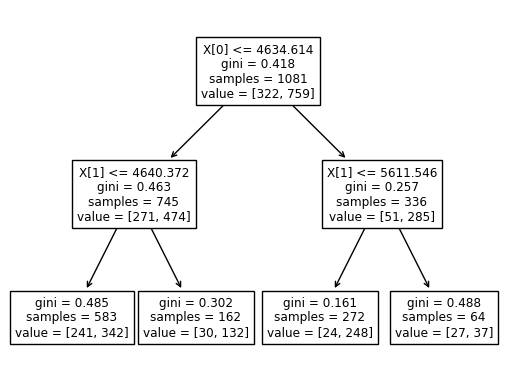

In [70]:
plot_tree(tree_clf);

#### Evaluate the Model

In [71]:
# evaluating the 2 depth model
print("Train Accuracy: ", accuracy_score(Y_train, tree_clf.predict(X_train)))
print("Test  Accuracy: ", accuracy_score(Y_test, tree_clf.predict(X_test)))

print("TEST Precision : ", precision_score(Y_test, tree_clf.predict(X_test)))
print("TRAIN Precision: ", precision_score(Y_train, tree_clf.predict(X_train)))


print("TEST ROC/AUC : ", roc_auc_score(Y_test, tree_clf.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(Y_train, tree_clf.predict_proba(X_train)[:,1]))

Train Accuracy:  0.7021276595744681
Test  Accuracy:  0.6980609418282548
TEST Precision :  0.6980609418282548
TRAIN Precision:  0.7021276595744681
TEST ROC/AUC :  0.6549985437600117
TRAIN ROC/AUC:  0.6758668237874287


/Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



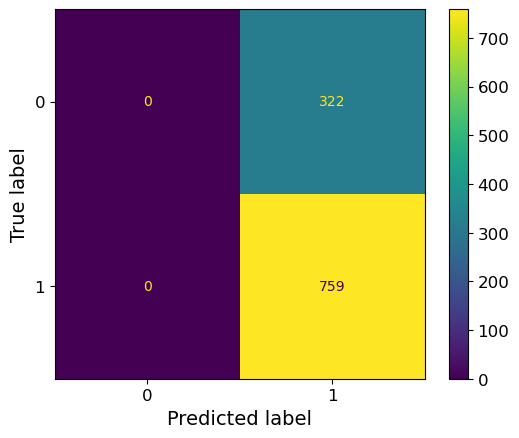

In [72]:
plot_confusion_matrix(tree_clf, X_train, Y_train)

#### Varying the depth and leafs

In [73]:
#trying a depth of 3
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

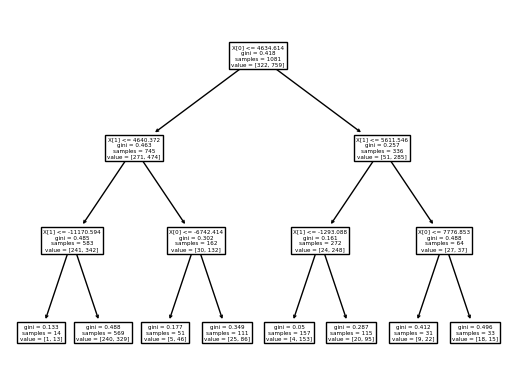

In [74]:
plot_tree(tree);

In [75]:
#metrics for max depth of 3
print("Train Accuracy: ", accuracy_score(Y_train, tree.predict(X_train)))
print("Test  Accuracy: ", accuracy_score(Y_test, tree.predict(X_test)))

print("TEST Precision : ", precision_score(Y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(Y_train, tree.predict(X_train)))


print("TEST ROC/AUC : ", roc_auc_score(Y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(Y_train, tree.predict_proba(X_train)[:,1]))

Train Accuracy:  0.7049028677150786
Test  Accuracy:  0.703601108033241
TEST Precision :  0.7065527065527065
TRAIN Precision:  0.7099236641221374
TEST ROC/AUC :  0.7041102373671181
TRAIN ROC/AUC:  0.7021068093846923


In [76]:
# limiting the number of leafs
tree = DecisionTreeClassifier(min_samples_leaf = 10)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=10)

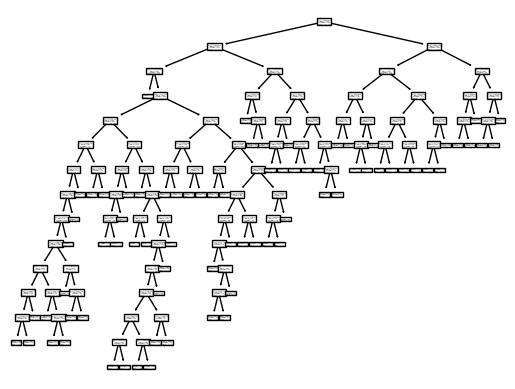

In [77]:
plot_tree(tree);

In [78]:
#metrics for max depth of 3
print("Train Accuracy: ", accuracy_score(Y_train, tree.predict(X_train)))
print("Test  Accuracy: ", accuracy_score(Y_test, tree.predict(X_test)))

print("TEST Precision : ", precision_score(Y_test, tree.predict(X_test)))
print("TRAIN Precision: ", precision_score(Y_train, tree.predict(X_train)))


print("TEST ROC/AUC : ", roc_auc_score(Y_test, tree.predict_proba(X_test)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(Y_train, tree.predict_proba(X_train)[:,1]))

Train Accuracy:  0.8038852913968547
Test  Accuracy:  0.6731301939058172
TEST Precision :  0.7410071942446043
TRAIN Precision:  0.8448928121059268
TEST ROC/AUC :  0.6763506625891947
TRAIN ROC/AUC:  0.8642010163749293


In [79]:
#moving 30% of the instances from the original training set into
X_train30, X_test30, y_train30, y_test30 = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

In [80]:
#creating a new test dataset by adding from the training dataset
#the features
frames = [X_test, X_test30]
X_result30 = pd.concat(frames)

# the labels
frames2 = [Y_test, y_test30]
Y_result30 = pd.concat(frames2)

In [81]:
#fitting the new dataset
# fitting the model with a depth of 2
tree_clf30 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf30.fit(X_train30, y_train30)


DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'X[0] <= -1457.905\ngini = 0.426\nsamples = 756\nvalue = [233, 523]'),
 Text(0.25, 0.5, 'X[1] <= 6331.566\ngini = 0.486\nsamples = 366\nvalue = [152, 214]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.496\nsamples = 321\nvalue = [147, 174]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(0.75, 0.5, 'X[1] <= 9753.892\ngini = 0.329\nsamples = 390\nvalue = [81, 309]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.29\nsamples = 358\nvalue = [63, 295]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.492\nsamples = 32\nvalue = [18, 14]')]

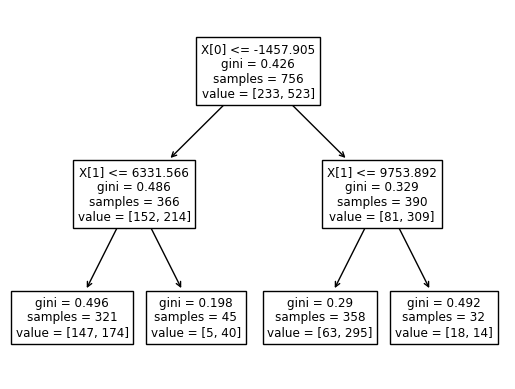

In [82]:
plot_tree(tree_clf30)

In [83]:
# evaluating the 2 depth model
print("Train Accuracy: ", accuracy_score(y_train30, tree_clf30.predict(X_train30)))
print("Test  Accuracy: ", accuracy_score(Y_result30, tree_clf30.predict(X_result30)))

print("TEST Precision : ", precision_score(Y_result30, tree_clf30.predict(X_result30)))
print("TRAIN Precision: ", precision_score(y_train30, tree_clf30.predict(X_train30)))


print("TEST ROC/AUC : ", roc_auc_score(Y_result30, tree_clf30.predict_proba(X_result30)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train30, tree_clf30.predict_proba(X_train30)[:,1]))

Train Accuracy:  0.6970899470899471
Test  Accuracy:  0.6793002915451894
TEST Precision :  0.7048929663608563
TRAIN Precision:  0.7030386740331491
TEST ROC/AUC :  0.6159391041563174
TRAIN ROC/AUC:  0.6830394144051731


In [84]:
#moving 60% of the instances from the original training set into
X_train60, X_test60, y_train60, y_test60 = train_test_split(X_train, Y_train, test_size=0.6, random_state=42)

In [85]:
#creating a new test dataset by adding from the training dataset
#the features
fr = [X_test, X_test60]
X_result60 = pd.concat(frames)

# the labels
fr2 = [Y_test, y_test60]
Y_result60 = pd.concat(frames2)

In [86]:
#fitting the new dataset
# fitting the model with a depth of 2
tree_clf60 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf60.fit(X_train60, y_train60)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'X[0] <= 4596.843\ngini = 0.43\nsamples = 432\nvalue = [135, 297]'),
 Text(0.25, 0.5, 'X[1] <= -919.333\ngini = 0.48\nsamples = 277\nvalue = [111, 166]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 130\nvalue = [64, 66]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.435\nsamples = 147\nvalue = [47, 100]'),
 Text(0.75, 0.5, 'X[1] <= 5611.546\ngini = 0.262\nsamples = 155\nvalue = [24, 131]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.138\nsamples = 121\nvalue = [9, 112]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.493\nsamples = 34\nvalue = [15, 19]')]

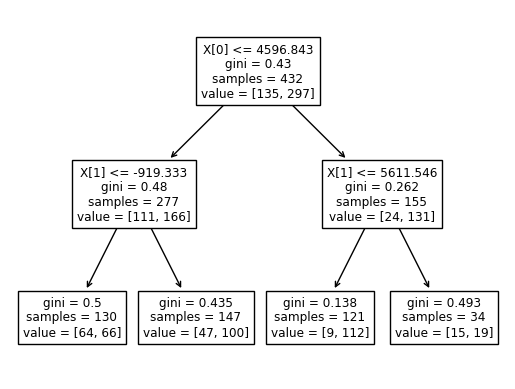

In [87]:
plot_tree(tree_clf60)

In [88]:
# evaluating the 2 depth model
print("Train Accuracy: ", accuracy_score(y_train60, tree_clf60.predict(X_train60)))
print("Test  Accuracy: ", accuracy_score(Y_result60, tree_clf60.predict(X_result60)))

print("TEST Precision : ", precision_score(Y_result60, tree_clf60.predict(X_result60)))
print("TRAIN Precision: ", precision_score(y_train60, tree_clf60.predict(X_train60)))


print("TEST ROC/AUC : ", roc_auc_score(Y_result60, tree_clf60.predict_proba(X_result60)[:,1]))
print("TRAIN ROC/AUC: ", roc_auc_score(y_train60, tree_clf60.predict_proba(X_train60)[:,1]))

Train Accuracy:  0.6875
Test  Accuracy:  0.7113702623906706
TEST Precision :  0.7113702623906706
TRAIN Precision:  0.6875
TEST ROC/AUC :  0.6773472429210134
TRAIN ROC/AUC:  0.7067340067340067


### RANDOM FORESTS

In [89]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, Y_train);

In [91]:
# creating predictions
y_pred = rf.predict(X_test)

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_test, y_pred))

Accuracy: 0.7229916897506925


### Performing test cases

### 30% case

In [93]:
# after moving 30% of the training data to the test data
random30 = rf.fit(X_train30, y_train30)

In [94]:
y_pred30 = rf.predict(X_result30)

In [95]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_result30, y_pred30))

Accuracy: 0.6953352769679301


### 60% case

In [96]:
#after moving 60% of the trainig data to the test data
random60 = rf.fit(X_train60, y_train60)

In [97]:
y_pred60 = rf.predict(X_result60)

In [98]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(Y_result60, y_pred60))

Accuracy: 0.7099125364431487


# WEEK 9

### LINEAR REGRESSION

In [99]:
#pip install plotnine

In [100]:
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [101]:
#creating a path for the salaries dataset
auto_dir = os.path.join("datasets", "insurance", "insurance_claims.csv")

In [102]:
#reading in the salaries data
claims_data = pd.read_csv(auto_dir)
claims_data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [103]:
#selecting relevant columns
columns = ["months_as_customer", "age", "policy_deductable","policy_annual_premium","umbrella_limit","injury_claim","property_claim","vehicle_claim","total_claim_amount"]

new_claims_data = claims_data[columns]
new_claims_data.head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  injury_claim  property_claim  vehicle_claim  \
0               0          6510           13020          52080   
1         5000000           780             780           3510   
2         5000000          7700            3850          23100   
3         6000000          6340            6340          50720   
4         6000000          1300             650           4550   

   total_claim_amount  
0               71610  
1                5070  
2               34650  
3               63400  
4                6500

In [104]:
#train test split
features = ["months_as_customer", "age", "policy_deductable","policy_annual_premium","umbrella_limit","injury_claim","property_claim","vehicle_claim"]

X = new_claims_data.loc[:, features]
y = new_claims_data.loc[:, "total_claim_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [105]:
X_train.shape

(750, 8)

In [106]:
y_train.shape

(750,)

In [107]:
y_train

82      7500
991    46980
789    38700
894     6000
398     3190
       ...  
106    79800
270    85300
860    58850
435    73400
102    28800
Name: total_claim_amount, Length: 750, dtype: int64

#### Visualising the data

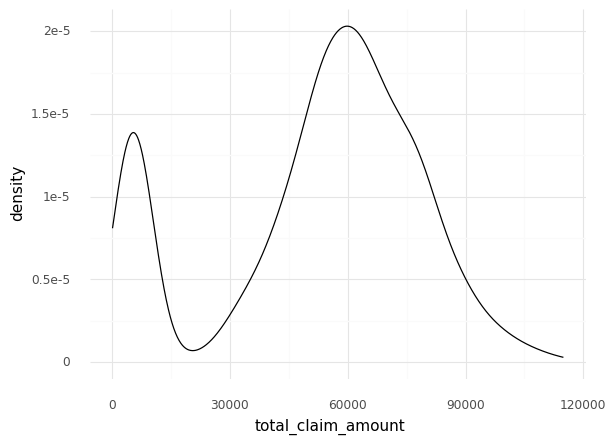

<ggplot: (8770738218780)>

In [108]:
(ggplot (new_claims_data, aes(x="total_claim_amount")) + geom_density() + theme_minimal())

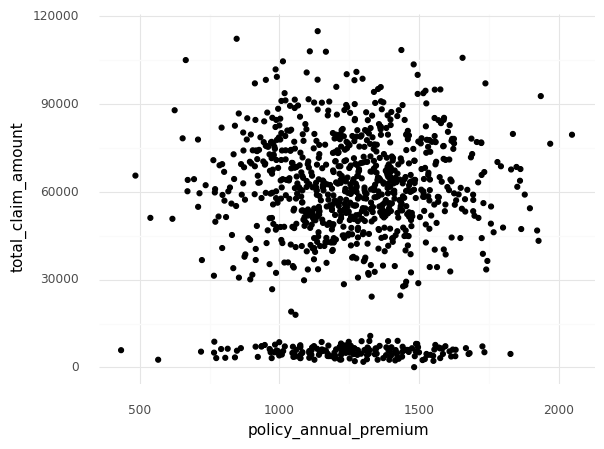

<ggplot: (8770738242027)>

In [109]:
# experience by salary

(ggplot(new_claims_data, aes(y="total_claim_amount", x="policy_annual_premium")) + geom_point()+theme_minimal())

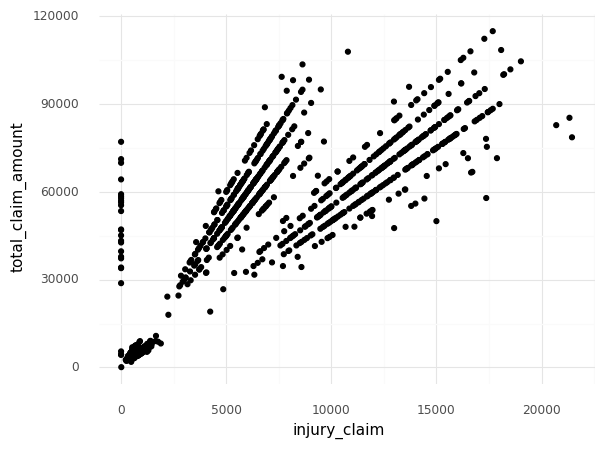

<ggplot: (8770735977448)>

In [110]:
(ggplot(new_claims_data, aes(y="total_claim_amount", x="injury_claim")) + geom_point()+theme_minimal())

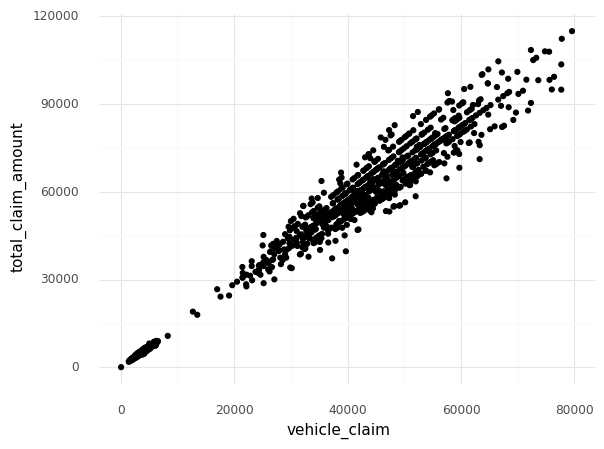

<ggplot: (8770735975891)>

In [111]:
(ggplot(new_claims_data, aes(y="total_claim_amount", x="vehicle_claim")) + geom_point()+theme_minimal())

### Linear Model

In [112]:
X_b = np.c_[np.ones((750, 1)), X_train]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train) # closed loop solution to determine model parameters ( w0 , w1 )

In [113]:
#model fit
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) #train linear regression on X and y
lin_reg.intercept_, lin_reg.coef_ # learning parameters 

(2.6921043172478676e-10,
 array([ 7.26066654e-13, -9.97297677e-12, -1.42502103e-14,  7.94709958e-16,
        -1.38394798e-17,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00]))

In [114]:
#pull coefficints
coefficients = pd.DataFrame({"Coef": lin_reg.coef_,
                            "Name": features})
coefficients = coefficients.append({"Coef": lin_reg.intercept_,
                                   "Name": "intercept"}, ignore_index=True)
coefficients

/var/folders/dj/55y_ks8n3wj87k_64ryc941w0000gn/T/ipykernel_1325/2250122846.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Coef                   Name
0  7.260667e-13     months_as_customer
1 -9.972977e-12                    age
2 -1.425021e-14      policy_deductable
3  7.947100e-16  policy_annual_premium
4 -1.383948e-17         umbrella_limit
5  1.000000e+00           injury_claim
6  1.000000e+00         property_claim
7  1.000000e+00          vehicle_claim
8  2.692104e-10              intercept

#### Model Evaluation

In [115]:
#predict
claim_pred = lin_reg.predict(X_test)
claim_pred[1:10]

array([52800., 67600., 62800.,  6820., 69300., 72840., 53730., 48950.,
        3690.])

In [116]:
#mse and mae
print(mean_squared_error(y_test,claim_pred))
print(mean_absolute_error(y_test,claim_pred))

2.7740932864425498e-21
4.1431121644563975e-11


In [117]:
#r2
print(r2_score(y_test, claim_pred))

1.0


In [118]:
# calculating the least squares solutions
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y_train, rcond=1e-6)
theta_best_svd # Least-squares solution

array([ 5.52954091e-13, -2.18215243e-12, -3.69966859e-15, -3.27371047e-16,
       -1.77805477e-16,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00])

In [119]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100      #batch size is 100 samples      

theta = np.random.randn(9,1)  # random initialization of the weights
#
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_train)# This is the gradient descent iteration  - m is for the batch version
    theta = theta - eta * gradients                # theta are the weights and updated acording to the gradient descent

ValueError: Data must be 1-dimensional

In [ ]:
theta

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_train, y_train)

In [ ]:
#predict
claimlog_pred = log_reg.predict(X_test)
claimlog_pred[1:10]

In [62]:
#mse and mae
print(mean_squared_error(y_test,claimlog_pred))
print(mean_absolute_error(y_test,claimlog_pred))

930050227.6
21791.64


# WEEK 10

### Perceptron and MLP

In [ ]:
pip install tensorflow

In [5]:
import sklearn
import tensorflow as tf
import numpy as np


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

ImportError: initialization failed

In [9]:
pip uninstall tensorflow

Found existing installation: tensorflow 2.9.1
Uninstalling tensorflow-2.9.1:
  Would remove:
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/estimator_ckpt_converter
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/import_pb_to_tensorboard
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/saved_model_cli
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/tensorboard
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/tf_upgrade_v2
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/tflite_convert
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/toco
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/bin/toco_from_protos
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/tensorflow-2.9.1.dist-info/*
    /Users/goabaonesehurutshe/opt/anaconda3/envs/F21DL/lib/python3.8/site-packages/tensorflow/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to u

In [7]:
conda uninstall tensorflow

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistenc/ 

  - defaults/osx-64::numba==0.55.1=py38hae1ba45_0
| ^C
/ 
Note: you may need to restart the kernel to use updated packages.
